# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [104]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [105]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | korla
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | kone
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | puerto aysen
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | ust-nera
Processing Record 14 of Set 1 | pedernales
Processing Record 15 of Set 1 | governor's harbour
City not found. Skipping...
Processing Record 16 of Set 1 | dunedin
Processing Record 17 of Set 1 | ahtari
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | tazovsky
Processing Record 20 of Set 1 | el granada
Processing Record 21 of Set 1

Processing Record 38 of Set 4 | espargos
City not found. Skipping...
Processing Record 39 of Set 4 | ouellah
City not found. Skipping...
Processing Record 40 of Set 4 | nar'yan-mar
Processing Record 41 of Set 4 | bichura
Processing Record 42 of Set 4 | chipinge
Processing Record 43 of Set 4 | enewetak
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | kabansk
Processing Record 46 of Set 4 | atafu village
Processing Record 47 of Set 4 | brusyliv
Processing Record 48 of Set 4 | linqiong
Processing Record 49 of Set 4 | dupont
Processing Record 0 of Set 5 | saint croix
Processing Record 1 of Set 5 | hammerfest
Processing Record 2 of Set 5 | taroa
Processing Record 3 of Set 5 | mana
Processing Record 4 of Set 5 | dapchi
Processing Record 5 of Set 5 | dudinka
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | samana
Processing Record 8 of Set 5 | temiskaming shores
Processing Record 9 of Set 5 | lihue
Processing Record 10 of Set 5 | acapulco de juarez


Processing Record 31 of Set 8 | mesquite
Processing Record 32 of Set 8 | brindisi
Processing Record 33 of Set 8 | westport
Processing Record 34 of Set 8 | dwarka
Processing Record 35 of Set 8 | ampanihy
Processing Record 36 of Set 8 | khuzdar
Processing Record 37 of Set 8 | hegang
Processing Record 38 of Set 8 | yur'yevets
Processing Record 39 of Set 8 | sunnyside
Processing Record 40 of Set 8 | colac
Processing Record 41 of Set 8 | ksar el boukhari
Processing Record 42 of Set 8 | tsetserleg
Processing Record 43 of Set 8 | newman
Processing Record 44 of Set 8 | camacupa
Processing Record 45 of Set 8 | tandil
Processing Record 46 of Set 8 | kabul
Processing Record 47 of Set 8 | laojunmiao
Processing Record 48 of Set 8 | puerto deseado
Processing Record 49 of Set 8 | vyazemskiy
Processing Record 0 of Set 9 | hithadhoo
Processing Record 1 of Set 9 | belmonte
Processing Record 2 of Set 9 | erenhot
Processing Record 3 of Set 9 | porto novo
Processing Record 4 of Set 9 | beledweyne
Processin

Processing Record 20 of Set 12 | hafar al-batin
Processing Record 21 of Set 12 | strelka
Processing Record 22 of Set 12 | valdivia
Processing Record 23 of Set 12 | kenora
Processing Record 24 of Set 12 | santa barbara
Processing Record 25 of Set 12 | carnarvon
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | brisas de zicatela
Processing Record 28 of Set 12 | argo
Processing Record 29 of Set 12 | kill devil hills
Processing Record 30 of Set 12 | padam
City not found. Skipping...
Processing Record 31 of Set 12 | ixtapa
Processing Record 32 of Set 12 | anabar
City not found. Skipping...
Processing Record 33 of Set 12 | kapa'a
Processing Record 34 of Set 12 | kununurra
Processing Record 35 of Set 12 | kinablangan
Processing Record 36 of Set 12 | saksaul'skiy
City not found. Skipping...
Processing Record 37 of Set 12 | anna regina
Processing Record 38 of Set 12 | bandon
Processing Record 39 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 40 of Set 12

In [106]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [107]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.28,61,73,16.68,TF,1689385922
1,korla,41.7597,86.1469,34.25,15,0,3.84,CN,1689385922
2,namibe,-15.1961,12.1522,19.56,41,0,2.76,AO,1689385923
3,kone,-21.0595,164.8658,24.17,45,61,4.89,NC,1689385923
4,thompson,55.7435,-97.8558,12.09,94,100,4.12,CA,1689385739


In [108]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [109]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.28,61,73,16.68,TF,1689385922
1,korla,41.7597,86.1469,34.25,15,0,3.84,CN,1689385922
2,namibe,-15.1961,12.1522,19.56,41,0,2.76,AO,1689385923
3,kone,-21.0595,164.8658,24.17,45,61,4.89,NC,1689385923
4,thompson,55.7435,-97.8558,12.09,94,100,4.12,CA,1689385739


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

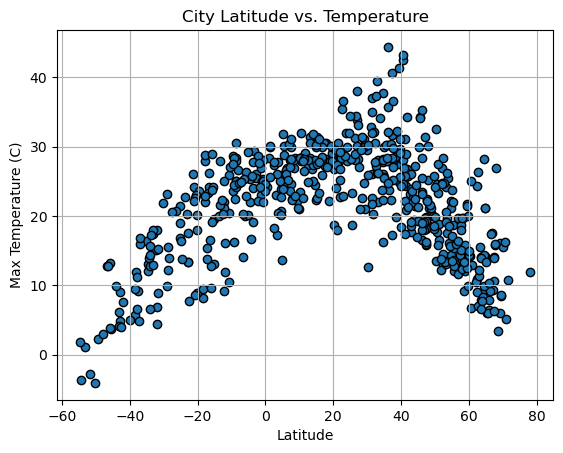

In [110]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True,linestyle='-')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

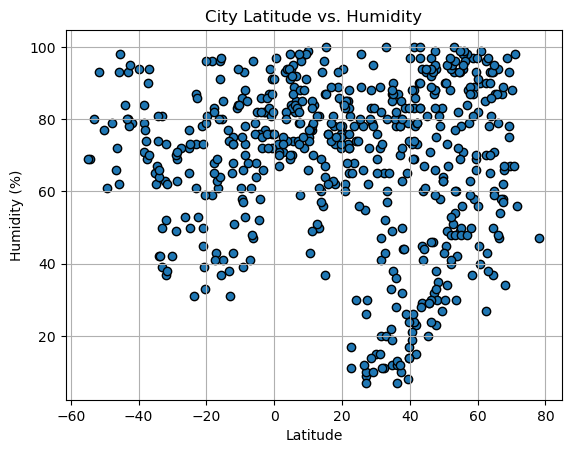

In [111]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True,linestyle='-')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

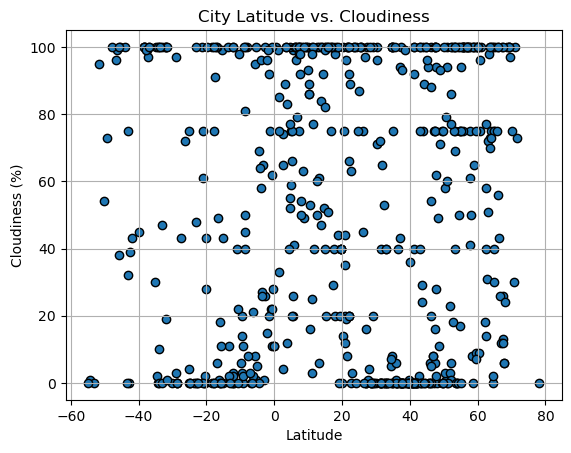

In [112]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True,linestyle='-')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

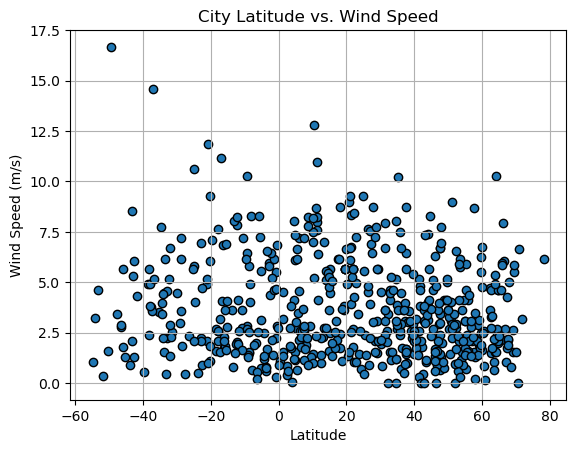

In [113]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker='o',edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True,linestyle='-')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [114]:
# Define a function to create Linear Regression plots


def LR_plots(x_axis,y_axis,xlabel,ylabel,annotate_coords,save_path):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    
    #calculating line equation.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    
    #plotting scatter plot.
    plt.scatter(x_axis,y_axis,marker='o')
    
    #plotting linear regression
    plt.plot(x_axis,regress_values,"r-")
    
    #adding equation of line to plot.
    plt.annotate(line_eq,annotate_coords,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig("output_data/"+save_path)
    plt.show()
    

In [115]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df=city_data_df[city_data_df['Lat']>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,korla,41.7597,86.1469,34.25,15,0,3.84,CN,1689385922
4,thompson,55.7435,-97.8558,12.09,94,100,4.12,CA,1689385739
6,hamilton,39.1834,-84.5333,27.47,65,0,2.57,US,1689385658
9,hawaiian paradise park,19.5933,-154.9731,27.73,72,40,5.66,US,1689385925
10,pacific grove,36.6177,-121.9166,23.78,87,40,3.60,US,1689385713


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df=city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.28,61,73,16.68,TF,1689385922
2,namibe,-15.1961,12.1522,19.56,41,0,2.76,AO,1689385923
3,kone,-21.0595,164.8658,24.17,45,61,4.89,NC,1689385923
5,puerto natales,-51.7236,-72.4875,-2.83,93,95,0.35,CL,1689385923
7,puerto aysen,-45.4000,-72.7000,3.70,98,100,1.31,CL,1689385627


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5977642129777025


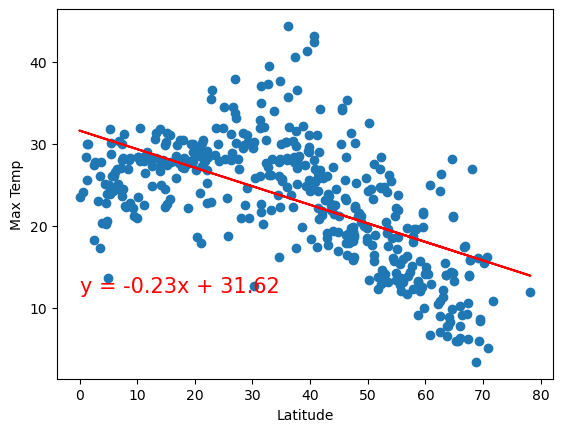

In [118]:
# Linear regression on Northern Hemisphere

#function call to plot latitude vs Max Temp for northern hemisphere.
LR_plots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp',(0,12),'Fig5.png')



The r-value is: 0.8003750757873325


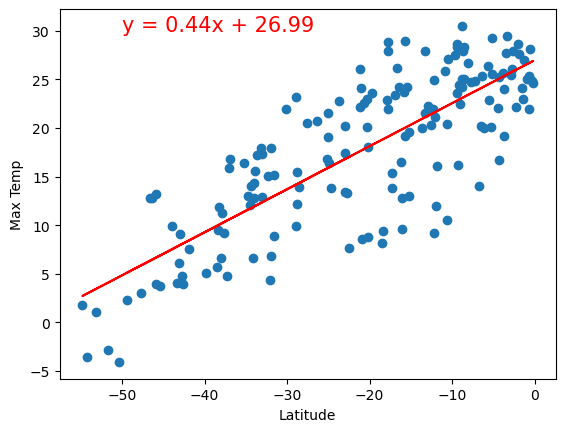

In [120]:
# Linear regression on Southern Hemisphere

LR_plots(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp',(-50,30),'Fig6.png')

**Discussion about the linear relationship:** For Northen Hemisphere we can observe that with increase in latitude the Max temp decreases. Whereas for southern hemisphere the Max temp increase with increase in latitude. So we can say that maximum temperature is observed near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.08562978951462534


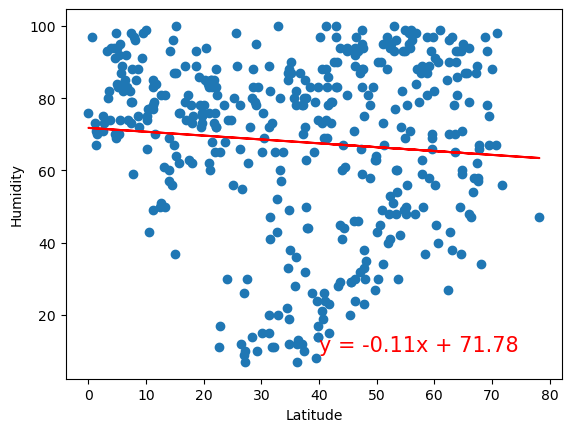

In [121]:
# Northern Hemisphere

LR_plots(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity',(40,10),'Fig7.png')

The r-value is: 0.009855958805630224


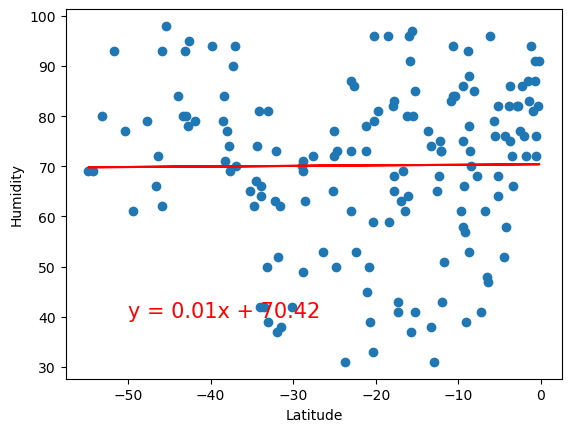

In [123]:
# Southern Hemisphere

LR_plots(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity',(-50,40),'Fig8.png')

**Discussion about the linear relationship:** From above plots we can see for Northern Hemisphere the humidity remains almost unaffected with change in latitude. For southern hemisphere as well the humidity remains almost unaffected with change in latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07003434033470501


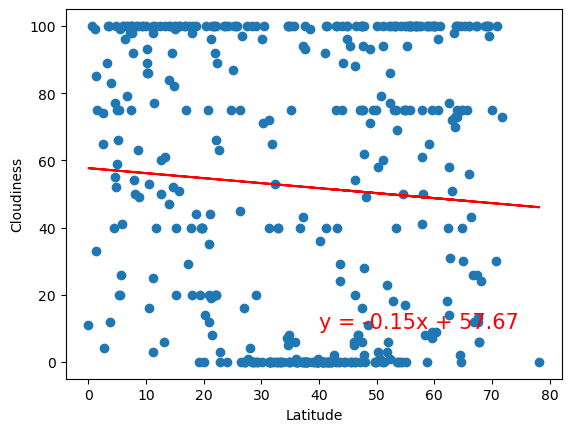

In [124]:
# Northern Hemisphere

LR_plots(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness',(40,10),'Fig9.png')

The r-value is: -0.17845204765213188


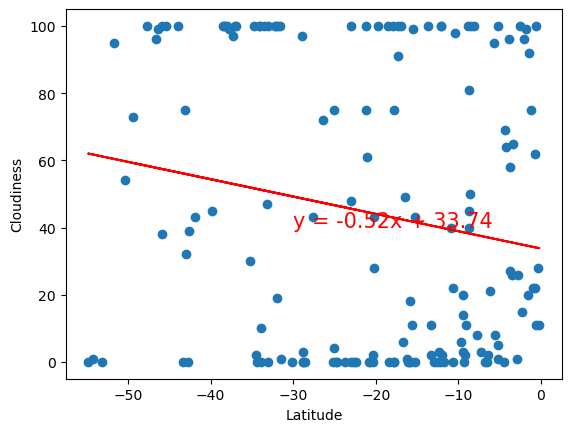

In [125]:
# Southern Hemisphere

LR_plots(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness',(-30,40),'Fig10.png')

**Discussion about the linear relationship:** From above plots we can see for Northern Hemisphere the Cloudiness drops slightly with increase in latitude. For southern hemisphere we can observe a drop in Cloudiness with increase in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13706057621580803


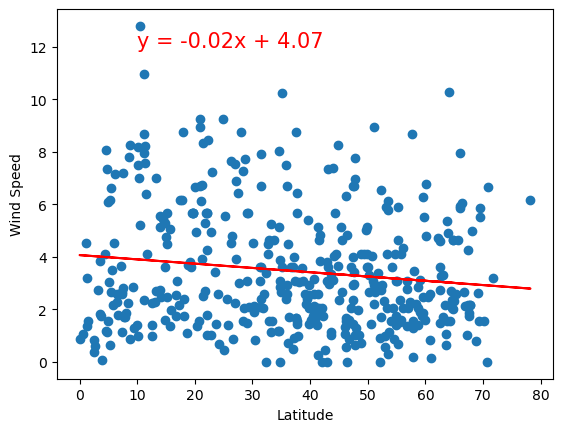

In [126]:
# Northern Hemisphere

LR_plots(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed',(10,12),'Fig11.png')

The r-value is: -0.057864707781598426


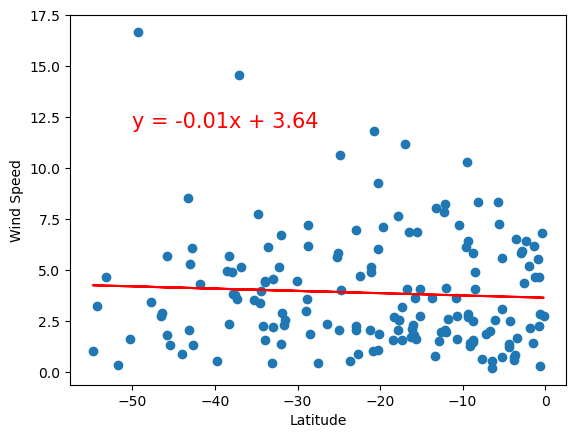

In [127]:
# Southern Hemisphere

LR_plots(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed',(-50,12),'Fig12.png')

**Discussion about the linear relationship:** From above plots we can see for both Hemispheres the Wind speed remains unaffected with change in latitude. Also it is observed that majority of the cities in both the hemispheres have wind speed lower than 5(m/s).